# Lab 4: Single Layer Perceptron and Multi-Layer Perceptron

### Name: Anuj Raval
### USN: 1AUA23BCS012 from B1

### TASK 1 — Single Layer Perceptron

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [4]:
# Linearly separable dataset
X = np.array([
    [2,2],
    [3,3],
    [4,4],
    [-2,-2],
    [-3,-3],
    [-4,-4]
], dtype=float)

y = np.array([1,1,1,0,0,0])

In [5]:
def train_perceptron(X, y, lr=0.1, epochs=20):
    w = np.zeros(2)
    b = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(w, X[i]) + b
            y_pred = 1 if z >= 0 else 0

            error = y[i] - y_pred

            w += lr * error * X[i]
            b += lr * error

    return w, b

Weights: [0.2 0.2]
Bias: -0.1


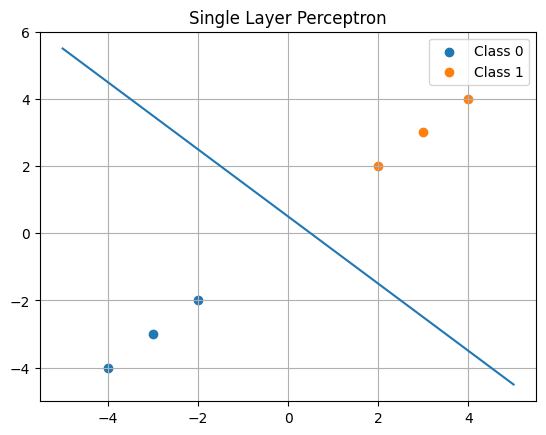

In [6]:
w, b = train_perceptron(X, y)

print("Weights:", w)
print("Bias:", b)

# Plot data
plt.scatter(X[y==0][:,0], X[y==0][:,1], label="Class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], label="Class 1")

# Decision boundary
x_vals = np.linspace(-5,5,100)
y_vals = -(w[0]*x_vals + b)/w[1]
plt.plot(x_vals, y_vals)

plt.legend()
plt.title("Single Layer Perceptron")
plt.grid(True)
plt.show()

### TASK 2 — Multi-Layer Perceptron

In [7]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype=float)

y = np.array([[0],[1],[1],[0]])

In [8]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [9]:
np.random.seed(1)

W1 = np.random.randn(2,4)
b1 = np.zeros((1,4))

W2 = np.random.randn(4,1)
b2 = np.zeros((1,1))

In [10]:
lr = 0.1
epochs = 5000
losses = []

for epoch in range(epochs):

    # Forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Loss
    loss = np.mean((y - y_hat)**2)
    losses.append(loss)

    # Backpropagation
    dz2 = (y_hat - y) * sigmoid_derivative(z2)
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2 @ W2.T * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

In [11]:
z1 = X @ W1 + b1
a1 = relu(z1)
z2 = a1 @ W2 + b2
y_hat = sigmoid(z2)

predictions = (y_hat > 0.5).astype(int)

print("Predictions:")
print(predictions)

Predictions:
[[0]
 [1]
 [1]
 [0]]


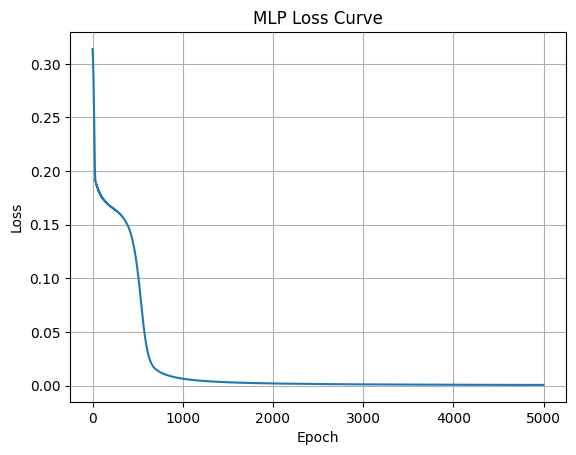

In [12]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Loss Curve")
plt.grid(True)
plt.show()

### TASK 3 — Comparison

In [13]:
w_xor, b_xor = train_perceptron(X, y.flatten())
print("Perceptron on XOR predictions:")
for i in range(len(X)):
    z = np.dot(w_xor, X[i]) + b_xor
    print(1 if z>=0 else 0)

Perceptron on XOR predictions:
1
1
0
0
